<a href="https://colab.research.google.com/github/gcbirat12/All_Projects/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import re
import joblib

# Load the Dataset
data_path = '/content/drive/My Drive/Sentiment_Analysis/all_data.csv'
data = pd.read_csv(data_path, header=None, encoding='ISO-8859-1', names=['Sentiment', 'News'])



In [3]:
data.head()

,Sentiment,News
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


neutral     2879
positive    1363
negative     604
Name: Sentiment, dtype: int64


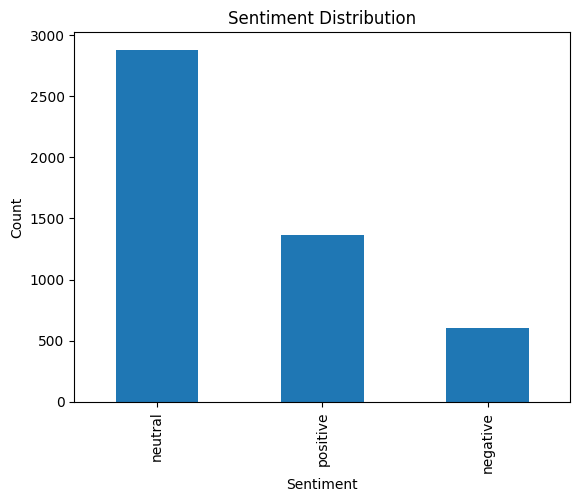

count    4846.000000
mean       23.101114
std         9.958474
min         2.000000
25%        16.000000
50%        21.000000
75%        29.000000
max        81.000000
Name: News_Length, dtype: float64


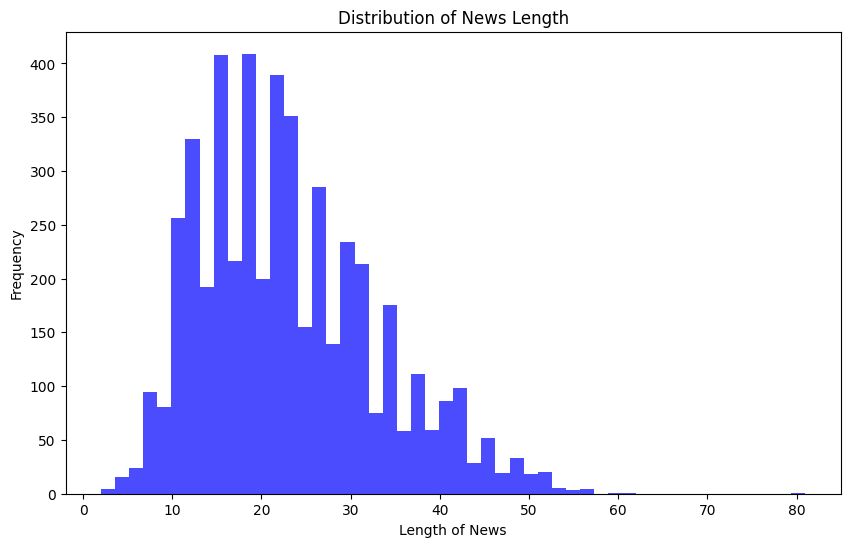

              precision    recall  f1-score   support

    negative       0.92      0.50      0.65       110
     neutral       0.75      0.95      0.84       571
    positive       0.79      0.52      0.63       289

    accuracy                           0.77       970
   macro avg       0.82      0.66      0.71       970
weighted avg       0.78      0.77      0.75       970



In [13]:
# Exploratory Data Analysis (EDA)
# 1. Sentiment Distribution
print(data['Sentiment'].value_counts())

# Plot the distribution
data['Sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# 2. News Length Analysis
data['News_Length'] = data['News'].apply(lambda x: len(x.split()))
print(data['News_Length'].describe())

# Plot News Length Distribution
plt.figure(figsize=(10, 6))
plt.hist(data['News_Length'], bins=50, color='blue', alpha=0.7)
plt.title('Distribution of News Length')
plt.xlabel('Length of News')
plt.ylabel('Frequency')
plt.show()

# Data Preprocessing
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text

data['Cleaned_News'] = data['News'].apply(clean_text)

# Preparing Data for Modeling
X_train, X_test, y_train, y_test = train_test_split(data['Cleaned_News'], data['Sentiment'], test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Training the Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# Model Evaluation
y_pred = model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))

# Save the Model and Vectorizer for Deployment
joblib.dump(model, 'sentiment_analysis_model.joblib')
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.joblib')

# Predictive Function
def predict_sentiment(text):
    model = joblib.load('sentiment_analysis_model.joblib')
    vectorizer = joblib.load('tfidf_vectorizer.joblib')
    cleaned_text = clean_text(text)
    vectorized_text = vectorizer.transform([cleaned_text])
    prediction = model.predict(vectorized_text)
    return prediction[0]



In [16]:
def predict_sentiment_interactive():
    # Load the saved model and vectorizer
    model = joblib.load('sentiment_analysis_model.joblib')
    vectorizer = joblib.load('tfidf_vectorizer.joblib')

    # Get user input
    example_text = input("Enter a piece of financial news to analyze its sentiment: ")

    # Preprocess and vectorize the input text
    cleaned_text = clean_text(example_text)
    vectorized_text = vectorizer.transform([cleaned_text])

    # Predict and return the sentiment
    predicted_sentiment = model.predict(vectorized_text)
    print(f"Predicted Sentiment: {predicted_sentiment[0]}")

# Call the interactive prediction function
predict_sentiment_interactive()



Enter a piece of financial news to analyze its sentiment: Smartphone maker Xiaomi switches from Apple to Tesla challenger as its first EV racks up 120,000 orders in 36 hours
Predicted Sentiment: positive
